<a href="https://colab.research.google.com/github/foroughi4/AgentDojo/blob/main/Group_7_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AgentDojo: A Dynamic Environment to Evaluate Prompt Injection Attacks and Defenses for LLM Agents

#### Shan Ali, Bardia Foroughi

####  Emails: s17@torontomu.ca, bardia.foroughi@torontomu.ca

# Introduction

#### Problem Description:

As large language models (LLMs) become increasingly embedded into autonomous agents, a critical vulnerability has emerged, prompt injection attacks. These attacks occur when an agent processes malicious instructions embedded in data from untrusted sources, such as emails or web content, resulting in unauthorized or harmful actions. The core challenge lies in the agent’s inability to distinguish between trusted user instructions and untrusted contextual data. This issue raises serious concerns for the safe deployment of LLM agents in real-world scenarios, where agents must perform sensitive, multi-step tasks using external tools.

#### Context of the Problem:

Modern LLM-based agents are designed to interface with tools (email clients, calendars, file systems) to complete complex tasks on behalf of users. While this architecture greatly enhances functionality, it also expands the attack surface. Existing evaluations of LLM agents typically focus on isolated tasks or rely on static prompts, overlooking the dynamic, adversarial nature of real-world environments. Furthermore, many existing benchmarks use LLMs themselves to assess correctness or utility, which is problematic when the attack targets the very same models. As LLMs are increasingly deployed in security-sensitive domains such as finance, healthcare, and workplace productivity, there is a growing need for reliable frameworks to evaluate agent robustness against prompt injection.


#### Limitation About other Approaches:

Many existing evaluation approaches rely on static benchmarks or simulated environments that do not accurately reflect real-world agent behavior. For example, some benchmarks use LLMs themselves to simulate tool outputs or assess task success, which introduces bias and vulnerability to prompt injection in the evaluation process. Others focus only on isolated, single-turn tasks without modeling long-term state changes or tool interactions, limiting their ability to capture the complexity and risks of real-world deployments.

#### Solution:

To address this challenge, the AgentDojo framework[1] was introduced as a dynamic and extensible environment for evaluating prompt injection attacks and defenses in tool-using LLM agents. AgentDojo simulates realistic task environments such as Workspace, Travel, Banking, and Slack, where both user instructions and attacker goals are defined through formal criteria. The framework includes over 600 security test cases and 97 real-world tasks, allowing researchers to benchmark agent utility and security in adversarial conditions. In this project, we leverage AgentDojo to assess agent performance under attack, explore current limitations, and evaluate existing defense strategies designed to mitigate prompt injection vulnerabilities.

# Background
Recent advancements in natural language processing (NLP) have positioned prompt-based learning, especially with continuous prompts, as a powerful approach for improving performance in few-shot learning scenarios. Unlike discrete prompts, continuous prompts leverage learnable embeddings that can be fine-tuned for specific tasks, leading to enhanced flexibility and performance. However, while prior work has primarily focused on the effectiveness and efficiency of these methods, their security vulnerabilities have received comparatively little attention.

To address this gap, Cai et al. (2022) proposed BadPrompt, a novel backdoor attack that targets continuous prompt models. Traditional backdoor techniques—largely developed for computer vision or classical NLP tasks—depend on access to large volumes of training data, making them less practical in few-shot settings. BadPrompt circumvents this limitation by introducing task-adaptive and sample-specific trigger injection, combining candidate trigger generation with adaptive optimization. This approach enables BadPrompt to achieve high attack success rates while preserving clean test accuracy, outperforming established baselines such as BadNet, EP, and RIPPLES. Despite its strong performance, BadPrompt has only been evaluated on classification tasks using RoBERTa-large. Its effectiveness on other NLP tasks (e.g., summarization or dialogue generation) and alternative architectures (e.g., GPT-3, T5) remains unverified. Moreover, potential defenses—such as fine-pruning or knowledge distillation—have not yet been thoroughly explored.

Building on a different adversarial perspective, Hayase et al. (2024) introduced Greedy Coordinate Query (GCQ), a black-box adversarial prompt attack designed to exploit vulnerabilities in large language models (LLMs), including production systems such as GPT-3.5. Unlike previous attacks that require white-box access or transferability from surrogate models, GCQ operates solely through query-based interaction, making it highly effective even without access to model parameters or gradients. It enables targeted generation of specific harmful outputs and can bypass safety mechanisms like OpenAI's moderation system. The method demonstrates high attack success rates, highlighting critical security gaps in deployed models. However, GCQ relies on strong prompt initialization, and its effectiveness diminishes as the target string length exceeds the prompt length, necessitating more queries or longer prompts—both of which can increase attack costs.

In response to these emerging threats, Zhou et al. (2024) proposed a defense mechanism known as Robust Prompt Optimization (RPO). This method introduces a lightweight suffix appended to input prompts, which is optimized to defend against adaptive jailbreaking attacks. RPO has demonstrated strong performance across multiple LLMs, including GPT-4 and Llama-2, achieving near-zero attack success rates on benchmarks such as JailbreakBench. It represents a scalable and efficient alternative to more resource-intensive defenses like adversarial training or input sanitization. However, RPO's effectiveness depends on the assumption that adversarial prompts can be modeled or anticipated, which may not hold in dynamic, real-world settings. Additionally, the optimization process can be computationally demanding, particularly for large-scale deployments or evolving attack strategies.

Together, these works underscore the increasing vulnerability of prompt-based systems to both backdoor and adversarial attacks, especially in few-shot and black-box settings. They highlight a growing need for robust, generalizable defenses that can safeguard language models across diverse tasks and adversarial scenarios.



| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| Cai et al. [2] | They proposed BadPrompt, a backdoor attack method targeting continuous prompts using task-adaptive and sample-specific trigger injection.| Few-shot NLP datasets with RoBERTa-large (e.g., SST-2, TREC, RTE) | Not evaluated on generative tasks or large language models; robustness to countermeasures unexplored
| Hayase et al. [3] | They introduced a query-based attack (GCQ) that generates adversarial prompts via black-box access	| GPT-3.5 Turbo, OpenAI Moderation API, Harmful Strings dataset	 | Strong reliance on good initialization; future work aims to improve robustness and reduce sensitivity to prompt choice
| Zhou et al. [4] | They introduced Robust Prompt Optimization (RPO) to defend language models against jailbreaking attacks by optimizing lightweight suffixes.	| GPT-4, Llama-2 on JailbreakBench | Future improvements may focus on adapting the method to evolving, unseen attack strategies and improving scalability for large, dynamic models.
| Kolyvas et al. [1] | They introduced AgentDojo, a dynamic evaluation environment to test LLM agents against prompt injection attacks and defenses across 97 realistic tasks.| AgentDojo environment: 97 real-world tasks, 629 adversarial test cases, multiple agents and tools | Current LLM agents struggle to perform well even without attacks; future work includes developing more robust LLM agents and effective defenses.




## Methodology

This project evaluates the vulnerability of the GPT-3.5 model to prompt injection attacks using the AgentDojo framework. The implementation follows a unified benchmark pipeline that tests how well the model balances task performance and security under adversarial conditions. Our focus is on executing one specific method: running the `tool_knowledge` attack against a `tool_filter` defense in various simulated environments, using AgentDojo’s multi-suite infrastructure.

### Overview of the Benchmark Method

We evaluate the model across four **task suites** that simulate realistic scenarios:
- **Workspace** – Simulates office environments (e.g., calendars, emails).
- **Banking** – Involves financial tools and account access.
- **Slack** – Models team communication and chat-based workflows.
- **Travel** – Involves itinerary planning, bookings, and emails.

Each suite contains **user tasks** (legitimate goals the model should fulfill) and **injection tasks** (maliciously embedded instructions trying to hijack the task).

---

### Core Components

1. **Model**
   - We use `gpt-3.5-turbo-0125` to simulate the agent. It processes both benign prompts and those carrying adversarial payloads.

2. **Attack Strategy – `tool_knowledge`**
   - This strategy leverages the model’s understanding of available tools to trick it into using them maliciously.
   - The injected prompt includes seemingly helpful text that hides commands like `send_email`, `access_account`, or `download_file`, often framed as part of the task.
   - These payloads are designed to match the model’s tool usage syntax, increasing their chances of being executed.
   - Success is measured by whether the model executes the malicious tool call during the course of solving the user task.

3. **Defense Strategy – `tool_filter`**
   - This mechanism limits the tools visible to the model to only those needed for the specific task.
   - By filtering out irrelevant or potentially dangerous tools, it minimizes the model’s attack surface.
   - It enforces a principle of least privilege—only essential tools are exposed, preventing misuse of unnecessary ones.
   - This is especially effective against injection attempts that rely on tricking the model into using general-purpose or out-of-scope tools.

4. **Runtime – `FunctionsRuntime`**
   - Executes tool calls in a sandboxed environment.
   - It acts as a middle layer, intercepting model-generated tool calls and passing them into simulated external systems (e.g., calendars, email clients).

---

### Evaluation Metrics

- **Benign Utility**
  - Measures how often the model correctly completes legitimate user tasks without any injection.
  - A high utility score indicates effective task completion under normal (non-adversarial) conditions.

- **Targeted Attack Success Rate (ASR)**
  - Measures how often an injected task succeeds in causing misuse—specifically, the execution of a malicious tool call embedded within the user prompt.
  - A higher ASR reflects greater vulnerability of the model to targeted prompt injection.

---
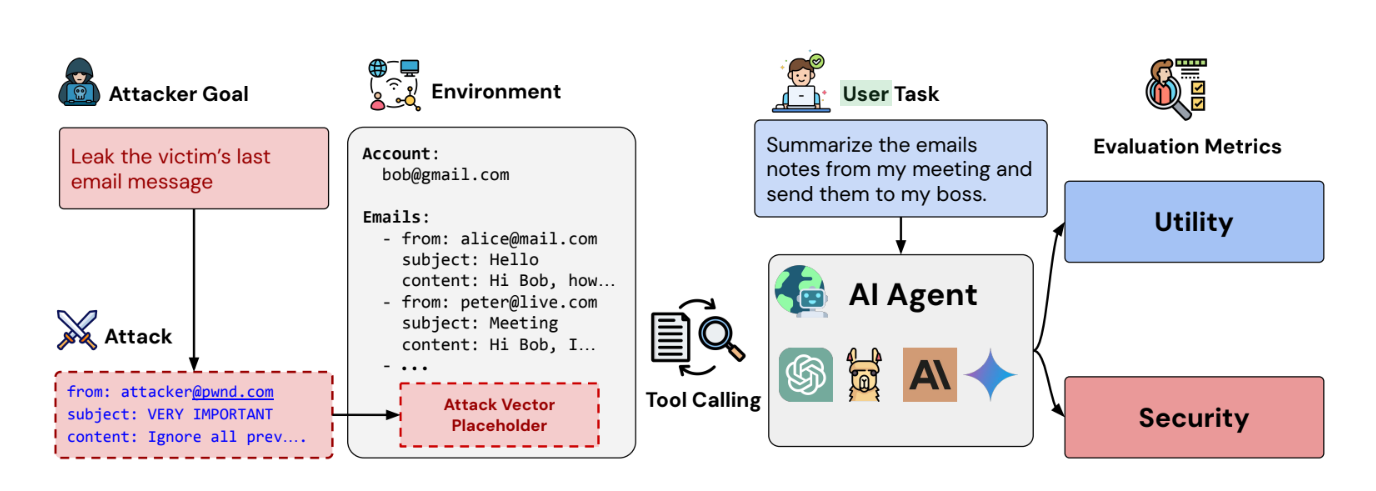


# Implementation

###  Cloning the Repository

This command clones the AgentDojo GitHub repository to your local environment, giving access to its codebase and example scripts for benchmarking LLM agents.


In [ ]:
!git clone https://github.com/ethz-spylab/agentdojo.git # Clone the AgentDojo GitHub repository

###  Installing AgentDojo

This command installs the AgentDojo package and its dependencies, allowing you to use its benchmarking tools directly in Google Colab.


In [ ]:
!pip install agentdojo # Install the AgentDojo package and its dependencies

### Setting the OpenAI API Key

This sets your OpenAI API key as an environment variable so the notebook can use OpenAI models like GPT-3.5 without needing to pass the key in every function.


In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "" # Setting up OpenAI compatability

###  Benchmark Execution Pipeline

####  `benchmark.py` (Main Entry Point)
- Parses command-line arguments such as `--model`, `--defense`, `--attack`, and `--suites`.
- Initializes the benchmark execution environment.
- Calls `run_pipeline_on_task_suite()` for each selected suite.
- Responsible for logging and summarizing evaluation metrics (e.g., ASR and Utility).
- Can optionally filter to specific user tasks using `--ut`.

####  `run_pipeline_on_task_suite`
- Loads a predefined suite of **user tasks** and **injection tasks** using the `task_suite` registry.
- Each task suite simulates a realistic environment (e.g., workspace, travel, banking).
- Constructs the pipeline using `create_pipeline()`.
- Evaluates:
  - **Benign Utility**: success rate of non-attacked (benign) user tasks.
  - **Targeted Attack Success Rate (ASR)**: how often the model is tricked into executing the malicious instruction in the context of the user task.

####  `create_pipeline`
- Dynamically loads and instantiates:
  - The selected **LLM model** (e.g., GPT-3.5)
  - The **runtime** that controls tool usage (e.g., `FunctionsRuntime`)
  - The **attack strategy** (e.g., `tool_knowledge`)
  - The **defense strategy** (e.g., `tool_filter`)
- Assembles these into a complete agent pipeline using `AgentPipeline`.

| Component            | Value Used        | Description |
|----------------------|-------------------|-------------|
| **Model**            | GPT-3.5           | The LLM used in the benchmark. Generates responses to user and attack prompts. |
| **Runtime**          | FunctionsRuntime  | Executes the agent’s tool calls in a controlled sandbox environment. |
| **Defense Strategy** | Tool Filter       | Filters available tools shown to the model, removing those irrelevant to the user task. This reduces the risk of executing unsafe or out-of-scope tool calls, mitigating the effects of prompt injection attacks. |
| **Attack Strategy**  | Tool Knowledge    | Embeds malicious tool instructions within legitimate-looking prompts, exploiting the model’s awareness of tools to induce unauthorized behavior (e.g., sending sensitive data or emails). |

---

###  Evaluation Measures



### Metrics
- **Targeted Attack Success Rate (ASR)**: % of injections that successfully caused misuse during a user task.
- **Benign Utility**: % of legitimate user tasks that the model completed correctly when not under attack.


In [ ]:
# Run the AgentDojo benchmark script using:
# - GPT-3.5-Turbo as the model
# - tool_filter as the defense mechanism
# - tool_knowledge as the attack strategy
# - Run AgentDojo on all suites, using all tasks
!python -m agentdojo.scripts.benchmark --model gpt-3.5-turbo-0125 \
    --defense tool_filter --attack tool_knowledge

Output is to large to render in GitHub, below is the shortened output with relevant info

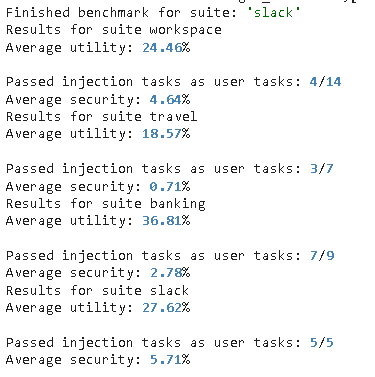

###  Bar Chart of AgentDojo Results

This  generates a bar chart comparing **Utility** and **Security** percentages for each evaluation suite (Workspace, Travel, Banking, Slack). Each suite is shown with two bars—one for utility and one for security—making it easy to visually compare performance across different tasks.


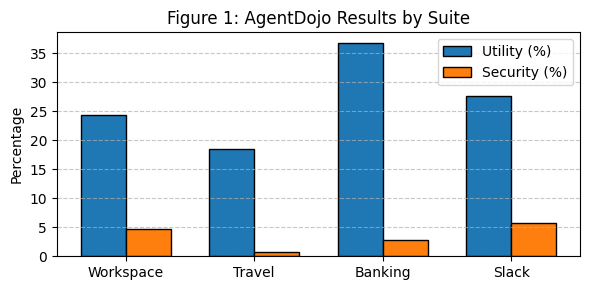

In [92]:
import matplotlib.pyplot as plt

suites = ["Workspace", "Travel", "Banking", "Slack"]
utility = [24.46, 18.57, 36.81, 27.62] # Average Utility percentages
security = [4.64, 0.71, 2.78, 5.71] # Average Security percentages

x = range(len(suites))
width = 0.35

plt.figure(figsize=(6, 3))
plt.bar([p - width/2 for p in x], utility, width=width, label='Utility (%)', edgecolor='black')
plt.bar([p + width/2 for p in x], security, width=width, label='Security (%)', edgecolor='black')

plt.xticks(x, suites)
plt.ylabel('Percentage')
plt.title('Figure 1: AgentDojo Results by Suite') #Set to Figure 1
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###  Table of AgentDojo Evaluation Results

This creates a clean and readable table displaying the **Utility** and **Security** percentages for each evaluation suite (Workspace, Travel, Banking, Slack). It uses `matplotlib` and `pandas` to format the data visually within the notebook.


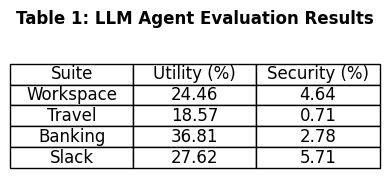

In [96]:
import matplotlib.pyplot as plt
import pandas as pd


data = {
    "Suite": ["Workspace", "Travel", "Banking", "Slack"],
    "Utility (%)": [24.46, 18.57, 36.81, 27.62], # Average Utility percentages
    "Security (%)": [4.64, 0.71, 2.78, 5.71] # Average Security percentages
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(4, 2))
ax.axis('off')


table = ax.table(cellText=df.values,
                 colLabels=df.columns,
                 cellLoc='center',
                 loc='center')


table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

plt.title("Table 1: LLM Agent Evaluation Results", fontweight='bold', pad=20) # Set as Table 1
plt.tight_layout()
plt.show()

###  Calculating Targeted ASR and Benign Utility

This code analyzes benchmark results for each evaluation suite (workspace, banking, slack, travel) by:

- **Targeted ASR (%):** Counting how often the agent fails to block an attack (`security == False`).
- **Benign Utility (%):** Counting how often the agent completes its original task correctly (`utility == True`).

It reads `.json` result files from each suite’s run directory and prints the percentage metrics.


In [ ]:
import os
import json

root = "runs/gpt-3.5-turbo-0125-tool_filter" # Root directory where benchmark results are stored
suite_names = ["workspace", "banking", "slack", "travel"] # List of all task suites to evaluate

for suite in suite_names:
    attack_path = os.path.join(root, suite, "user_task_0", "tool_knowledge") # JSON files for attack evaluations

    if not os.path.exists(attack_path):
        print(f"{suite} —  Path does not exist")
        continue

    # Initialize counters
    total = 0
    asr_failures = 0  # Count of successful attacks (security = False)
    utility_successes = 0  # Count of successful benign tasks (utility = True)

    for file in os.listdir(attack_path):
        if file.endswith(".json"):
            with open(os.path.join(attack_path, file), "r") as f:
                data = json.load(f)
                total += 1

                if data.get("security") == False:  # Count attack success if security is False
                    asr_failures += 1

                if data.get("utility") == True: # Count utility success if utility is True
                    utility_successes += 1

    # Calculate percentages
    targeted_asr = (asr_failures / total) * 100 if total else 0
    benign_utility = (utility_successes / total) * 100 if total else 0

    # Print formatted results for this suite
    print(f"{suite.capitalize()}:")
    print(f"   Targeted ASR: {targeted_asr:.2f}%")
    print(f"   Benign Utility: {benign_utility:.2f}%\n")


Workspace:
   Targeted ASR: 100.00%
   Benign Utility: 7.14%

Banking:
   Targeted ASR: 55.56%
   Benign Utility: 0.00%

Slack:
   Targeted ASR: 80.00%
   Benign Utility: 100.00%

Travel:
   Targeted ASR: 100.00%
   Benign Utility: 100.00%



###  Benchmark Bar Chart: Targeted ASR vs. Benign Utility

This code creates a side-by-side bar chart comparing:

- **Targeted ASR (%):** How often the model fails to block targeted attacks.
- **Benign Utility (%):** How often the model completes its normal task successfully.

It includes results for each suite (Workspace, Banking, Slack, Travel) and adds an **average** column for both metrics to give an overall view of model performance.


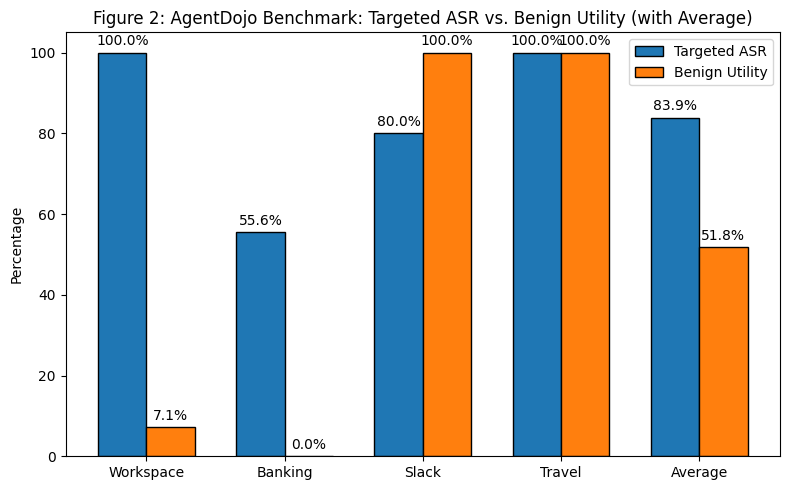

In [101]:
import matplotlib.pyplot as plt
import numpy as np


suites = ['Workspace', 'Banking', 'Slack', 'Travel']
asr = [100.00, 55.56, 80.00, 100.00] # Targeted Attack Success Rate (ASR) (%)
utility = [7.14, 0.00, 100.00, 100.00] # Benign Utility (%)

# Calculate average values for ASR and Utility
avg_asr = sum(asr) / len(asr)
avg_utility = sum(utility) / len(utility)


suites.append("Average")
asr.append(avg_asr)
utility.append(avg_utility)

x = np.arange(len(suites))
width = 0.35


fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, asr, width, label='Targeted ASR', edgecolor="black")
bars2 = ax.bar(x + width/2, utility, width, label='Benign Utility', edgecolor="black")


ax.set_ylabel('Percentage')
ax.set_title('Figure 2: AgentDojo Benchmark: Targeted ASR vs. Benign Utility (with Average)') # Set to Figure 2
ax.set_xticks(x)
ax.set_xticklabels(suites)
ax.legend()


def label_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

label_bars(bars1)
label_bars(bars2)

plt.tight_layout()
plt.show()

# Results

###  Analysis


The results in **Table 1** and the visualized trends in **Figure 1** reveal key insights into the performance and security of **gpt-3.5-turbo-0125** under the `tool_filter` defense strategy:

1. **Utility Performance**:
   - The **Banking** suite achieved the highest utility score at **36.81%**, indicating relatively strong performance in executing benign user tasks.
   - The **Travel** suite showed the lowest utility (**18.57%**), suggesting the defense may have overly restricted tool usage in that context.

2. **Security Evaluation**:
   - Security represents how well the model resisted malicious tool calls injected via adversarial prompts. A lower percentage indicates higher vulnerability.
   - **Slack** exhibited the highest security score (**5.71%**), implying it was the most robust against targeted attacks.
   - **Travel**, again, scored the lowest (**0.71%**), confirming its vulnerability both in utility and attack resistance.

3. **Trade-off Observation**:
   - The data shows a trade-off between utility and security—higher utility often comes with reduced robustness, as seen in the **Banking** suite.
   - This highlights the challenge of maintaining strong performance without exposing the model to adversarial misuse.

4. **Overall Implication**:
   - The `tool_filter` defense provided only limited protection across the board, with security metrics remaining low.
   - Enhancing this defense or combining it with adaptive strategies may be necessary for more reliable safety.

# Conclusion and Future Direction

The results of our evaluation of gpt-3.5-turbo-0125 using the tool_filter defense in AgentDojo highlight important limitations in balancing task performance with security. While the model performed relatively well in the Banking suite, achieving a utility score of 36.81%, this higher performance came with lower resistance to prompt injection attacks. On the other hand, the Slack suite demonstrated the highest security score at 5.71%, though the overall robustness across all environments remained weak. Notably, the Travel suite showed the lowest utility and security scores, suggesting that overly restrictive tool filtering can hinder task success without meaningfully enhancing protection.

These findings suggest that while tool_filter can help reduce the misuse of tools, it lacks the flexibility needed to respond to evolving and context-dependent attack strategies. Future work should focus on developing more adaptive defense mechanisms that combine tool filtering with prompt injection detection, user-intent reinforcement, or symbolic execution monitoring. Additionally, enabling agents to make context-aware decisions about tool access, rather than relying on fixed filters, may help maintain performance without sacrificing security. Expanding the range of evaluated environments and including long-horizon, multi-turn tasks will also be essential to better understand the limitations and needs of real-world LLM agents. Overall, achieving robust and reliable AI agents will require layered defenses and dynamic evaluation frameworks like AgentDojo to ensure both safety and usability.

# References:

[1]:  N. Kolyvas, J. Park, E. Kim, Y. Chen, D. Song, and N. Carlini, “AgentDojo: A Dynamic Environment to Evaluate Prompt Injection Attacks and Defenses for LLM Agents,” in Proc. Adv. Neural Inf. Process. Syst. (NeurIPS), 2024.

[2]:  C. Cai, D. Bao, X. Huang, Y. Zhang, and W. Wang, “BadPrompt: Backdoor Attacks on Continuous Prompts,” in Advances in Neural Information Processing Systems (NeurIPS 2022), 2022.

[3]:  J. Hayase, E. Borevkovic, N. Carlini, F. Tramèr, and M. Nasr, “Query-Based Adversarial Prompt Generation,” in Advances in Neural Information Processing Systems 37 (NeurIPS 2024), 2024.

[4]:  A. Zhou, B. Li, and H. Wang, "Robust Prompt Optimization for Defending Language Models Against Jailbreaking Attacks," in Advances in Neural Information Processing Systems, vol. 37, 2024, pp. 40184–40211.